In [35]:
!pip install replicate
!pip install seaborn matplotlib pandas

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE

In [37]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv", sep=";")

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


In [38]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
print("Kolom dataset:", df.columns.tolist())
print(df.head())

Kolom dataset: ['Person_ID', 'Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level', 'BMI_Category', 'Blood_Pressure', 'Heart_Rate', 'Daily_Steps', 'Sleep_Disorder']
   Person_ID  Gender  Age Occupation  Sleep_Duration  Quality_of_Sleep  \
0        374  Female   59      Nurse             8.1                 9   
1        375    Male   29     Doctor             7.8                 7   
2        376    Male   29     Doctor             7.8                 7   
3        377    Male   29     Doctor             6.1                 6   
4        378    Male   29     Doctor             7.8                 7   

   Physical_Activity_Level  Stress_Level BMI_Category Blood_Pressure  \
0                       75             3   Overweight         140/95   
1                       75             6       Normal         120/80   
2                       75             6       Normal         120/80   
3                       30             8     

#EDA (Exploratory Data Analysis)

In [39]:
print("Kolom dataset:", df.columns.tolist())
print("\n5 data teratas:")
print(df.head())

print("\nInfo Dataset:")
print(df.info())

print("\nCek Missing Values:")
print(df.isnull().sum())

print("\nJumlah nilai unik Sleep_Disorder:")
print(df["Sleep_Disorder"].value_counts(dropna=False))

Kolom dataset: ['Person_ID', 'Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level', 'BMI_Category', 'Blood_Pressure', 'Heart_Rate', 'Daily_Steps', 'Sleep_Disorder']

5 data teratas:
   Person_ID  Gender  Age Occupation  Sleep_Duration  Quality_of_Sleep  \
0        374  Female   59      Nurse             8.1                 9   
1        375    Male   29     Doctor             7.8                 7   
2        376    Male   29     Doctor             7.8                 7   
3        377    Male   29     Doctor             6.1                 6   
4        378    Male   29     Doctor             7.8                 7   

   Physical_Activity_Level  Stress_Level BMI_Category Blood_Pressure  \
0                       75             3   Overweight         140/95   
1                       75             6       Normal         120/80   
2                       75             6       Normal         120/80   
3                       30  

# Preprocessing

In [40]:
from sklearn.preprocessing import LabelEncoder

# Buat df_clean (drop Unknown pada Sleep_Disorder)
df_clean = df[df["Sleep_Disorder"] != "Unknown"].copy()

# Copy dataframe biar aman
df_encoded = df_clean.copy()

# Deteksi kolom kategorikal (tipe object)
categorical_cols = df_encoded.select_dtypes(include=["object"]).columns

# Encode semua kolom kategorikal
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

print("Kolom setelah encoding:", df_encoded.columns.tolist())


Kolom setelah encoding: ['Person_ID', 'Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level', 'BMI_Category', 'Blood_Pressure', 'Heart_Rate', 'Daily_Steps', 'Sleep_Disorder']


In [41]:
X = df_encoded.drop("Sleep_Disorder", axis=1)
y = df_encoded["Sleep_Disorder"]

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

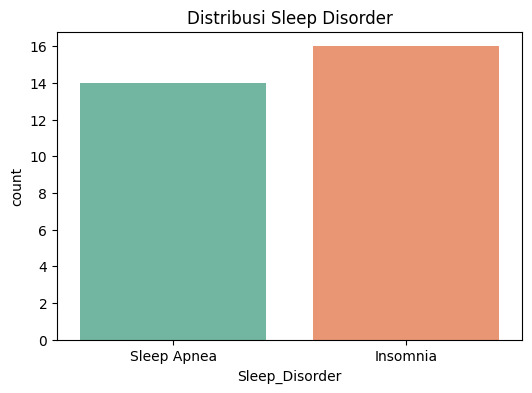

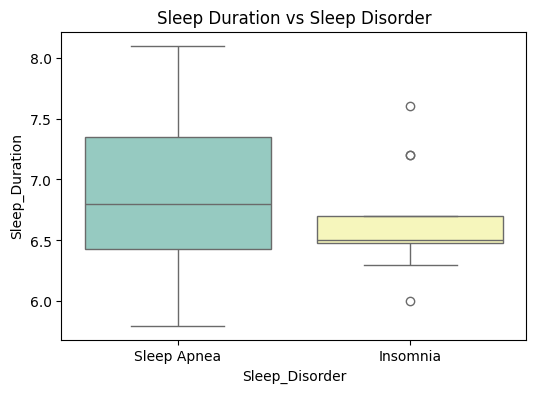

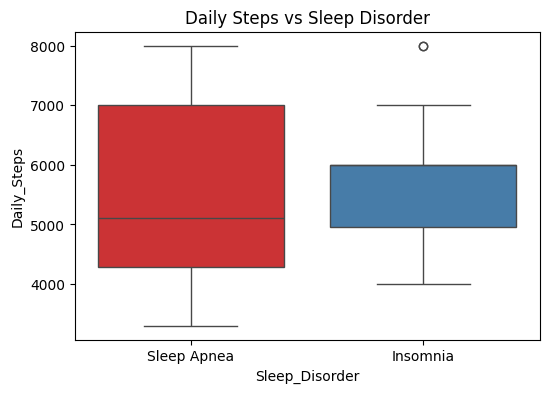

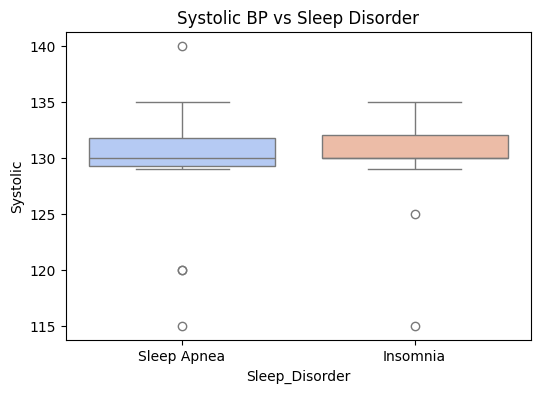

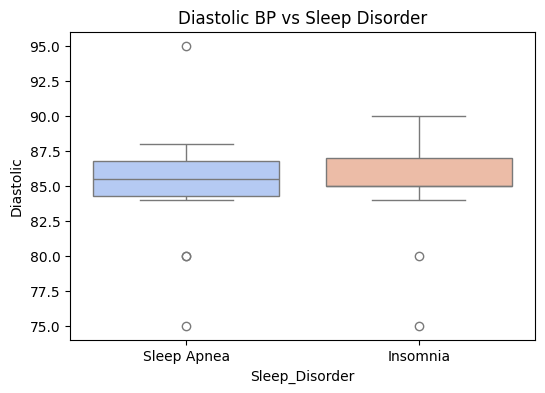

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Visualisasi 1: Distribusi Sleep Disorder ----
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sleep_Disorder', hue='Sleep_Disorder', palette='Set2', legend=False)
plt.title("Distribusi Sleep Disorder")
plt.show()

# ---- Visualisasi 2: Sleep Duration per Sleep Disorder ----
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Sleep_Disorder', y='Sleep_Duration', hue='Sleep_Disorder', palette='Set3', legend=False)
plt.title("Sleep Duration vs Sleep Disorder")
plt.show()

# ---- Visualisasi 3: Daily Steps per Sleep Disorder ----
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Sleep_Disorder', y='Daily_Steps', hue='Sleep_Disorder', palette='Set1', legend=False)
plt.title("Daily Steps vs Sleep Disorder")
plt.show()

# ---- Visualisasi 4: Blood Pressure vs Sleep Disorder ----
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Sleep_Disorder', y='Systolic', hue='Sleep_Disorder', palette='coolwarm', legend=False)
plt.title("Systolic BP vs Sleep Disorder")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Sleep_Disorder', y='Diastolic', hue='Sleep_Disorder', palette='coolwarm', legend=False)
plt.title("Diastolic BP vs Sleep Disorder")
plt.show()


In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)

Ukuran X_train: (148, 12)
Ukuran X_test: (38, 12)


Jumlah data sebelum SMOTE: {2: 156, 0: 16, 1: 14}
Jumlah data sesudah SMOTE: {1: 156, 2: 156, 0: 156}

Voting Classifier Accuracy: 0.8297872340425532
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.84      0.84      0.84        31
           2       0.77      0.94      0.85        32

    accuracy                           0.83        94
   macro avg       0.84      0.83      0.83        94
weighted avg       0.84      0.83      0.83        94



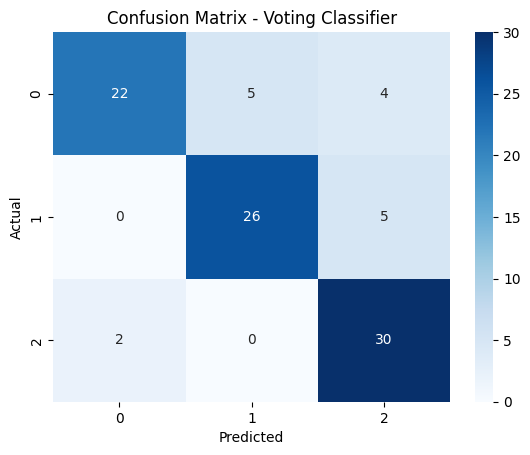

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier

# ====== 1. SMOTE ======
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("Jumlah data sebelum SMOTE:", y.value_counts().to_dict())
print("Jumlah data sesudah SMOTE:", y_res.value_counts().to_dict())

# Split setelah oversampling
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# ====== 2. Voting Classifier ======
log_reg = LogisticRegression(max_iter=500, random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('nb', nb),
        ('knn', knn)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)

# ====== Evaluasi ======
print("\nVoting Classifier Accuracy:", accuracy_score(y_test, y_pred_vote))
print(classification_report(y_test, y_pred_vote))

cm = confusion_matrix(y_test, y_pred_vote)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Voting Classifier")
plt.show()


# Modeling

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    results.append((name, acc))

# Bandingkan hasil
import pandas as pd
df_results = pd.DataFrame(results, columns=["Model", "Accuracy"])
print("\nPerbandingan Akurasi Model:")
print(df_results)



Logistic Regression Accuracy: 0.86
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        31
           1       0.82      0.90      0.86        31
           2       0.81      0.94      0.87        32

    accuracy                           0.86        94
   macro avg       0.88      0.86      0.86        94
weighted avg       0.88      0.86      0.86        94

Confusion Matrix:
 [[23  4  4]
 [ 0 28  3]
 [ 0  2 30]]

Random Forest Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.93      0.90      0.92        31
           2       0.91      1.00      0.96        32

    accuracy                           0.93        94
   macro avg       0.93      0.92      0.92        94
weighted avg       0.93      0.93      0.92        94

Confusion Matrix:
 [[27  2  2]
 [ 2 28  1]
 [ 0  0 32]]

Naive Bayes Accuracy: 0.73
              precision    recal

# LLaMA

In [49]:
import os
os.environ["REPLICATE_API_TOKEN"] = "r8_Ho1PvJ9xnWlHl1B8BVH3sIWzchuThq63bcwdn"

In [50]:
import replicate

# Contoh: pakai LLaMA 2 Chat
output = replicate.run(
  "meta/llama-2-13b-chat",
  input={
    "prompt": "Classify the sleep disorder based on: Age 45, Sleep Duration 5.5h, Heart Rate 78, Blood Pressure 140/95, BMI Overweight, Occupation Software Engineer."
  }
)

print("Prediction:", "".join(output))

Prediction:  Thank you for providing the information. Based on the symptoms you have provided, the sleep disorder that the person may be experiencing is likely to be classified as "Obstructive Sleep Apnea" (OSA).

OSA is a common sleep disorder that occurs when the airway collapses or becomes blocked, causing pauses in breathing. This can lead to symptoms such as snoring, difficulty breathing, and excessive daytime sleepiness.

Based on the information provided, the person's age of 45, sleep duration of 5.5 hours, and BMI of overweight may increase the risk of developing OSA. Additionally, the person's heart rate of 78 and blood pressure of 140/95 may also be indicative of OSA.

However, it is important to note that a proper diagnosis can only be made by a qualified medical professional, such as a sleep specialist or a primary care physician, after conducting a comprehensive evaluation, including an overnight sleep study.

It is important to seek medical attention if you suspect you or